In [0]:
import torch
import torchvision
import torch.nn.functional as F
from torch import nn,optim
from torchvision import transforms, datasets

In [0]:
##이미지출력 -> matplot ,, 행렬변환 numpy
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D ##3차원 plot 그리는 것 
from matplotlib import cm ## 데이터포인트에 색상 입히는것
import numpy as np 

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")
DEVICE 

device(type='cuda')

In [0]:
##하이퍼 파라미터들 
EPOCH = 30
BATCH_SIZE = 64


In [0]:
## dataset 
image_download_url = "/content/gdrive/My Drive/Colab Notebooks/pytorch/autoencoder"
trainset = datasets.FashionMNIST(
    root = image_download_url,
    train = True,
    download = True,
    transform = transforms.ToTensor()
)
train_loader = torch.utils.data.DataLoader(
    dataset = trainset,
    batch_size = BATCH_SIZE,
    shuffle = True,
    num_workers = 2
)

In [0]:
class Autoencoder (nn.Module):
  def __init__(self):
    super(Autoencoder,self).__init__()

    self.encoder = nn.Sequential(
        nn.Linear(28*28,128),
        nn.ReLU(),
        nn.Linear(128,64),
        nn.ReLU(),
        nn.Linear(64,12),
        nn.ReLU(),
        nn.Linear(12,3),
    )## 잠재변수 feature ==3 

    self.decoder = nn.Sequential(
        nn.Linear(3,12),
        nn.ReLU(),
        nn.Linear(12,64),
        nn.ReLU(),
        nn.Linear(64,128),
        nn.ReLU(),
        nn.Linear(128,28*28),
        nn.Sigmoid(), ##출력값 0 or 1
    )

  def forward(self,x):
  #  print("in autoencoder")
    encoded =self.encoder(x)
  #  print("second")
    decoded = self.decoder(encoded)
  #  print("third")
    return encoded, decoded


In [0]:
autoencoder = Autoencoder().to(DEVICE)
optimizer = torch.optim.Adam(autoencoder.parameters(),lr = 0.005)
#adam == sgd변형 함수로 학습중인 기울기를 참고하여 학습속도를 자동으로 변화시킴
criterion = nn.MSELoss() 
## 원본과의 차이를 보는 거라서 제곱 오차 함수 



In [0]:
##원본이미지 시각화하기 (첫번째 열 ->)
view_data = trainset.data[:5].view(-1,28*28)
## trainser에 있는 5개의 사진을 가져오기 
view_data =view_data.type(torch.FloatTensor)/255
## 픽셀이 255임으로 0~1사이로 만들기 


In [0]:
def train(autoencoder,train_loader):
  autoencoder.train()
 ## print(2222)
  for step,(x,label) in enumerate(train_loader):
    x = x.view(-1,28*28).to(DEVICE)
    y = x.view(-1,28*28).to(DEVICE)
    label = label.to(DEVICE)
   # print(3333)
    encoded, decoded = autoencoder(x)

   # print(5555)
    loss = criterion(decoded,y)
    optimizer.zero_grad() ##기존의 기울기 초기화
    loss.backward() ## 기울기 구하고
    optimizer.step() ## 학습 ~ 
    

[epoch 1]


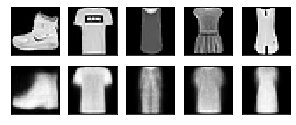

[epoch 2]


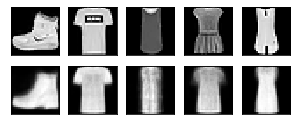

[epoch 3]


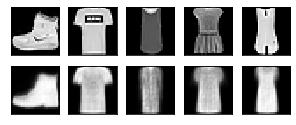

[epoch 4]


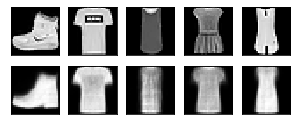

[epoch 5]


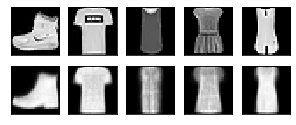

[epoch 6]


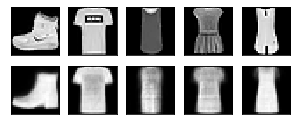

[epoch 7]


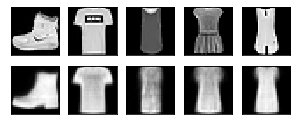

[epoch 8]


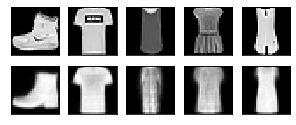

[epoch 9]


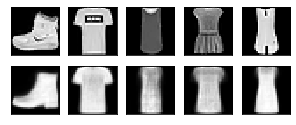

[epoch 10]


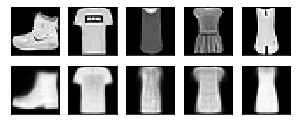

[epoch 11]


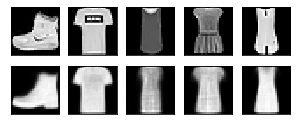

[epoch 12]


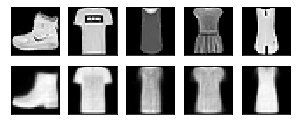

[epoch 13]


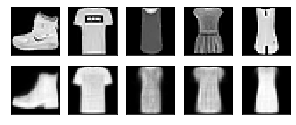

[epoch 14]


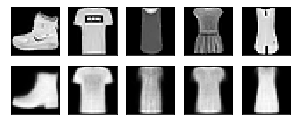

[epoch 15]


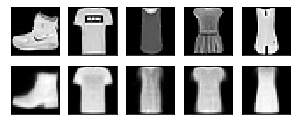

[epoch 16]


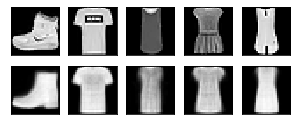

[epoch 17]


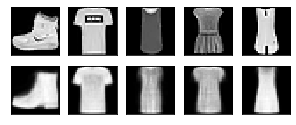

[epoch 18]


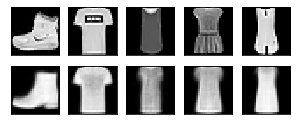

[epoch 19]


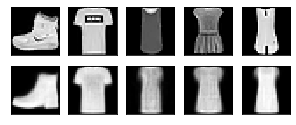

[epoch 20]


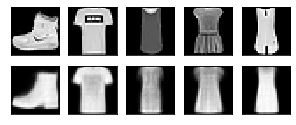

[epoch 21]


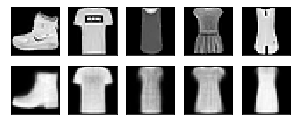

[epoch 22]


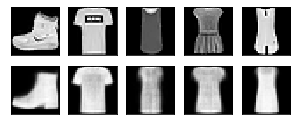

[epoch 23]


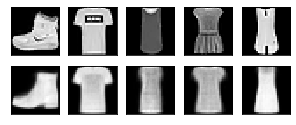

[epoch 24]


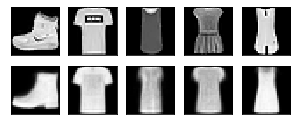

[epoch 25]


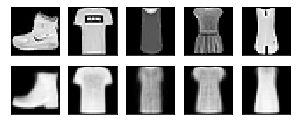

[epoch 26]


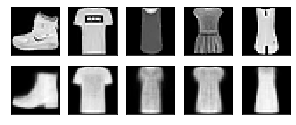

[epoch 27]


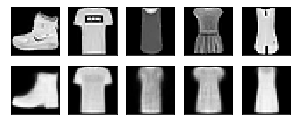

[epoch 28]


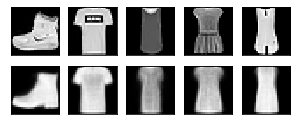

[epoch 29]


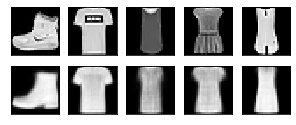

[epoch 30]


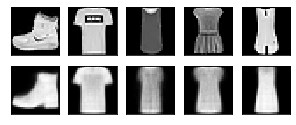

In [12]:
for epoch in range(1,EPOCH+1):
  train(autoencoder,train_loader)

  ## 디코더에서 나온 이미지 시각화하기 
  test_x = view_data.to(DEVICE) ##아까 남겨둔 이미지들을 
  ## 한 에폭 학습을 마친 모델에 넣고 빼기 
  _, decoded_data = autoencoder(test_x)

  ##원본과 비교해보기 ~ 
  f,a = plt.subplots(nrows=2,ncols=5,figsize=(5,2))
  ## subplot -> 액자를 만드는 것 2줄 5칸의 액자 만들고 
 # 첫번째 줄에는 원본 이미지를 두번째 줄에는 복원한 이미지를 
  print("[epoch {}]".format(epoch))

  for i in range(5):
    ##matplot은 텐서를 지원하지 x -> numpy로 바꿔줘야함 
    img = np.reshape(view_data.data.numpy()[i],(28,28))
    a[0][i].imshow(img,cmap='gray')
    a[0][i].set_xticks(())
    a[0][i].set_yticks(())
  for i in range(5):
    ##matplot은 텐서를 지원하지 x -> numpy로 바꿔줘야함 
    img = np.reshape(decoded_data.to("cpu").data.numpy()[i],(28,28))
    a[1][i].imshow(img,cmap='gray')
    a[1][i].set_xticks(())
    a[1][i].set_yticks(())
  
  plt.show()

In [0]:
## 잠재변수 어떻게 생겻는지 ㅂ보기 

view_data = trainset.data[:200].view(-1,28*28) ## 200개만 보기
view_data = view_data.type(torch.FloatTensor)/255 # 0~1사이값으로 변환 
test_x = view_data.to(DEVICE)
encoded_data,_ = autoencoder(test_x)
encoded_data = encoded_data.to("cpu")


In [0]:
CLASSES = {
    0:'T-shirt,top',
    1:'TROUSER',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'sandal',
    6:'Shirt',
    7:'sneaker',
    8:'bag',
    9:'ankle_boot'
}

Axes3D(0,0;1x1)


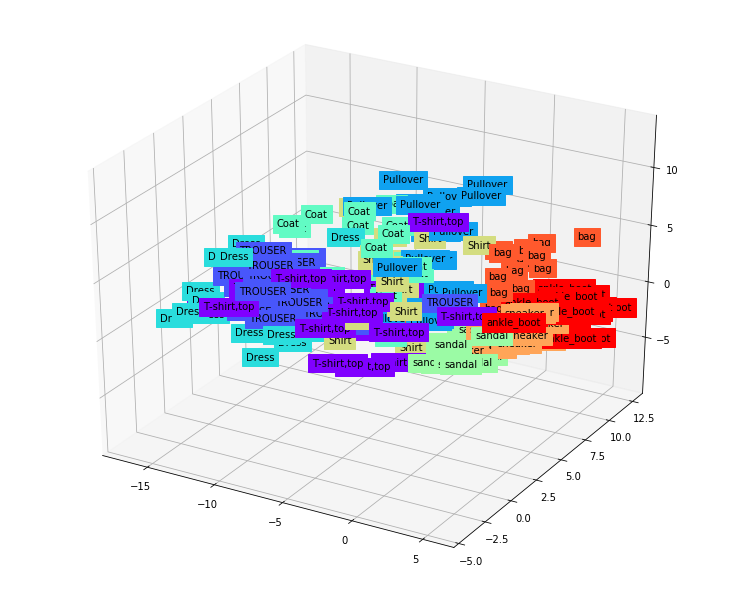

In [22]:
## axes3d() 함수로 3차원의 액자를 만든 후 잠재변수의 차원 x,y,z 추출하여 numpy로 변환 

fig = plt.figure(figsize=(10,8))
ax = Axes3D(fig)
print(ax)

#print(encoded_data.data)
X = encoded_data.data[:,0].numpy()
Y = encoded_data.data[:,1].numpy()
Z = encoded_data.data[:,2].numpy()
labels = trainset.targets[:200].numpy()

for x,y,z,s in zip(X,Y,Z,labels):
  name = CLASSES[s]
  color = cm.rainbow(int(255*s/9))
  ax.text(x,y,z,name,backgroundcolor=color)

ax.set_xlim(X.min(),X.max())
ax.set_ylim(Y.min(),Y.max())
ax.set_zlim(Z.min(),Z.max())

plt.show()


In [0]:

### 망가진 이미지 복원하기 

## 기존 오토인코더랑 다른점은 학습할때 입력에 잡음을 더해서 복원능력을 강화한 것 

def add_noise(img):
  noise = torch.randn(img.size())*0.2 ## 강도는 0.2로 
  noisy_img = img+noise
  return noisy_img

In [24]:
def train(autoencoder,train_loader):
  autoencoder.train()
  avg_loss = 0
  for step,(x,label) in enumerate(train_loader):
    x = add_noise(x) ##기존 이미지에 노이즈 추가 
    x = x.view(-1,28*28).to(DEVICE)
    y = x.view(-1,28*28).to(DEVICE)

    label = label.to(DEVICE)
    encoded, decoded = autoencoder(x)

    loss = criterion(decoded,y)
    optimizer.zero_grad()
    ##-> epoch마다 새로운 경사값을 계산할 것이므로 zero_grad 호출하여 경사값을 0으로 설정 
    loss.backward()
    ## 오차함수 == criterion을 가중치로 미분하여 오차가 최소가 되는 방향을 구하고   
    optimizer.step()
    ## 그 방향으로 모델을 학습률 만큼 이동시킴
    
    avg_loss += loss.item()
  return avg_loss/len(train_loader)


for epoch in range(1,EPOCH+1):
  loss = train(autoencoder,train_loader)
  print("[EPOCH {}] loss : {}".format(epoch,loss))


[EPOCH 1] loss : 0.06221371863696621
[EPOCH 2] loss : 0.061607942088389954
[EPOCH 3] loss : 0.0614595298113218
[EPOCH 4] loss : 0.06142389055476514
[EPOCH 5] loss : 0.061320593814923566
[EPOCH 6] loss : 0.061487249942667195
[EPOCH 7] loss : 0.06127030374224125
[EPOCH 8] loss : 0.06126009585109474
[EPOCH 9] loss : 0.06119432593030589
[EPOCH 10] loss : 0.061276989689132554
[EPOCH 11] loss : 0.0611072501251057
[EPOCH 12] loss : 0.06116633496876719
[EPOCH 13] loss : 0.061127716310020445
[EPOCH 14] loss : 0.06108175369420413
[EPOCH 15] loss : 0.06113235582945062
[EPOCH 16] loss : 0.061024610711726296
[EPOCH 17] loss : 0.06109503742807837
[EPOCH 18] loss : 0.061086487644580384
[EPOCH 19] loss : 0.06115296374220076
[EPOCH 20] loss : 0.061138962008265546
[EPOCH 21] loss : 0.06108995245050774
[EPOCH 22] loss : 0.061026360422595224
[EPOCH 23] loss : 0.06112005339184804
[EPOCH 24] loss : 0.060976409553877835
[EPOCH 25] loss : 0.0609664481832211
[EPOCH 26] loss : 0.060975231690955825
[EPOCH 27] lo

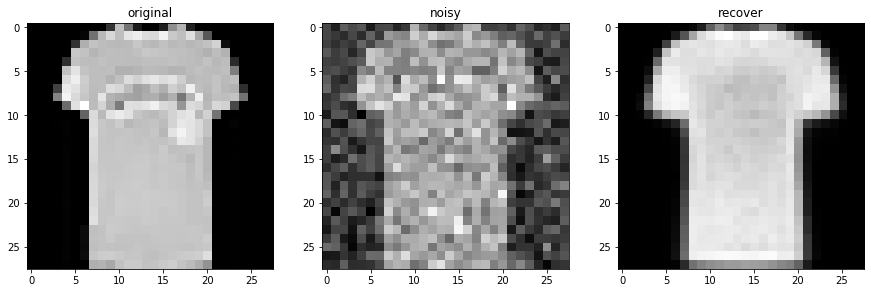

In [43]:
## 잡음 제거 한거 시각화 해서 봐보기 

testset = datasets.FashionMNIST(
    root = image_download_url,
    train = False,
    download = True,
    transform = transforms.ToTensor()
)

## testset에서 x번째 이미지 한장을 가져와 모델의 입력으로 사용 
x = 19
sample_data = testset.data[x].view(-1,28*28)
sample_data = sample_data.type(torch.FloatTensor)/255.

original_x = sample_data[0]
noisy_x = add_noise(original_x).to(DEVICE)
_,recover_x = autoencoder(noisy_x)

##시각화 위해 subplot()로 1행3열의 표를 정의., 이미지 크기 : 15*15 
f,a = plt.subplots(1,3,figsize=(15,15))

## 시각화 위해 numpy로 바꿔줌 
original_img = np.reshape(original_x.to("cpu").data.numpy(),(28,28))
noisy_img = np.reshape(noisy_x.to("cpu").data.numpy(),(28,28))
recover_img = np.reshape(recover_x.to("cpu").data.numpy(),(28,28))

a[0].set_title('original')
a[0].imshow(original_img,cmap='gray')
a[1].set_title('noisy')
a[1].imshow(noisy_img,cmap='gray')
a[2].set_title('recover')
a[2].imshow(recover_img,cmap='gray')

plt.show()